# Comp721 Project Part B: Predicting the outcome of a game given two teams

# Feature Selection


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filepath = "/content/team_season.csv"
df = pd.read_csv(filepath)

# Renaming of columns in the corpus. This is done for easier understanding of the data. 
# The capital O, in O_FGA for example, indicates data for the opposing teams. 
# The lack of the O, in FGA for example, indicates the teams data.

df.rename(
    columns={"team" : "Team", "o_fgm" : "FGM", "o_fga" : "FGA", "o_ftm" : "FTM", "o_fta" : "FTA", "o_oreb" : "OReb", "o_dreb" : "DReb",
       "o_reb" : "TReb", "o_asts" : "AST", "o_pf" : "PF", "o_stl" : "STL", "o_to" : "TO", "o_blk" : "BLK", "o_3pm" : "3PM", "o_3pa" : "3PA",
       "o_pts" : "PTS", "d_fgm" : "O_FGM", "d_fga" : "O_FGA", "d_ftm" : "O_FTM", "d_fta" : "O_FTA", "d_oreb" : "O_OReb", "d_dreb" : "O_DReb", 
       "d_reb" : "O_TReb", "d_asts" : "O_AST", "d_pf" : "O_PF", "d_stl" : "O_STL", "d_to" : "O_TO", "d_blk" : "O_BLK", "d_3pm" : "O_3PM",
       "d_3pa" : "O_3PA", "d_pts" : "O_PTS"}, inplace=True)


# Further metrics calculated to help build a stronger model

# Field Goal Percentage = Field Goal / Field Goal Attempted
df["FG%"] = df["FGM"] / df["FGA"]
df["FG%"] = df["FG%"].fillna(0)

df["O_FG%"] = df["O_FGM"] / df["O_FGA"]
df["O_FG%"] = df["O_FG%"].fillna(0)

# Free Throw Percentage = Free Throw / Free Throw Attempted
df["FT%"] = df["FTM"] / df["FTA"]
df["FT%"] = df["FT%"].fillna(0)

df["O_FT%"] = df["O_FTM"] / df["O_FTA"]
df["O_FT%"] = df["O_FT%"].fillna(0)

# 3- Point Field Goal Percentage = 3-Point Field Goal / 3-Point Field Goal Attempted
df["3P%"] = df["3PM"] / df["3PA"]
df["3P%"] = df["3P%"].fillna(0)

df["O_3P%"] = df["O_3PM"] / df["O_3PA"]
df["O_3P%"] = df["O_3P%"].fillna(0)

# Free Throw Rate = Free Throw / Field Goal Attempted
df["FTr"] = df["FTM"] / df["FGA"]
df["FTr"] = df["FTr"].fillna(0)

# Turnover Percentage = Turnover / ((0.44 * Field Goal Attempted) + Turnover)
df["TO%"] = df["TO"] / (df["FGA"] + (0.44 * df["FTA"]) + df["TO"])
df["TO%"] = df["TO%"].fillna(0)

df["O_TO%"] = df["O_TO"] / (df["O_FGA"] + (0.44 * df["O_FTA"]) + df["O_TO"])
df["O_TO%"] = df["O_TO%"].fillna(0)

# Offensive Rebound Percentage = Offensive Rebound / (Offensive Rebound + Defensive Rebound)
df["OReb%"] = df["OReb"] / (df["OReb"] + df["DReb"])
df["OReb%"] = df["OReb%"].fillna(0)

# Effective Field Goal Percentage = (Field Goal + (0.5 * 3-Point Field Goal)) / Field Goal Attempted
df["eFG%"] = (df["FGM"] + (0.5 * df["3PM"])) / df["FGA"]
df["eFG%"] = df["eFG%"].fillna(0)

df["O_eFG%"] = (df["O_FGM"] + (0.5 * df["O_3PM"])) / df["O_FGA"]
df["O_eFG%"] = df["O_eFG%"].fillna(0)


df.drop(columns=["year", "leag", "Team"], inplace=True)

df.head()

,FGM,FGA,FTM,FTA,OReb,DReb,TReb,AST,PF,STL,TO,BLK,3PM,3PA,PTS,O_FGM,O_FGA,O_FTM,O_FTA,O_OReb,O_DReb,O_TReb,O_AST,O_PF,O_STL,O_TO,O_BLK,O_3PM,O_3PA,O_PTS,pace,won,lost,FG%,O_FG%,FT%,O_FT%,3P%,O_3P%,FTr,TO%,O_TO%,OReb%,eFG%,O_eFG%
0,1397,5133,811,1375,0,0,0,470,1202,0,0,0,0,0,3605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3900,0.0,22,38,0.272161,0.0,0.589818,0.0,0.0,0.0,0.157997,0.0,0.0,0.0,0.272161,0.0
1,1879,6309,939,1550,0,0,0,436,1473,0,0,0,0,0,4697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4471,0.0,39,22,0.297828,0.0,0.605806,0.0,0.0,0.0,0.148835,0.0,0.0,0.0,0.297828,0.0
2,1674,5699,903,1428,0,0,0,494,1246,0,0,0,0,0,4251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4308,0.0,30,30,0.293736,0.0,0.632353,0.0,0.0,0.0,0.158449,0.0,0.0,0.0,0.293736,0.0
3,1437,5843,923,1494,0,0,0,482,1351,0,0,0,0,0,3797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3918,0.0,20,40,0.245935,0.0,0.617805,0.0,0.0,0.0,0.157967,0.0,0.0,0.0,0.245935,0.0
4,1465,5255,951,1438,0,0,0,457,1218,0,0,0,0,0,3881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3840,0.0,33,27,0.278782,0.0,0.661335,0.0,0.0,0.0,0.180971,0.0,0.0,0.0,0.278782,0.0


## Feature Selection for Win Prediction Model

Finding features in the dataset that have a Pearson's Correlation Coefficient of at least medium strength with number of wins

In [2]:
corr = df.corr().abs()
corr = corr.loc[corr['won']>.2]
corr.index

Index(['FGM', 'FGA', 'FTM', 'FTA', 'TReb', 'AST', 'PTS', 'won', 'lost', 'FG%',
       'FT%', 'eFG%'],
      dtype='object')

The relationship between filtered features above and number of wins are shown in the heatmap below

Text(0.5, 429.0, 'Team Statistics')

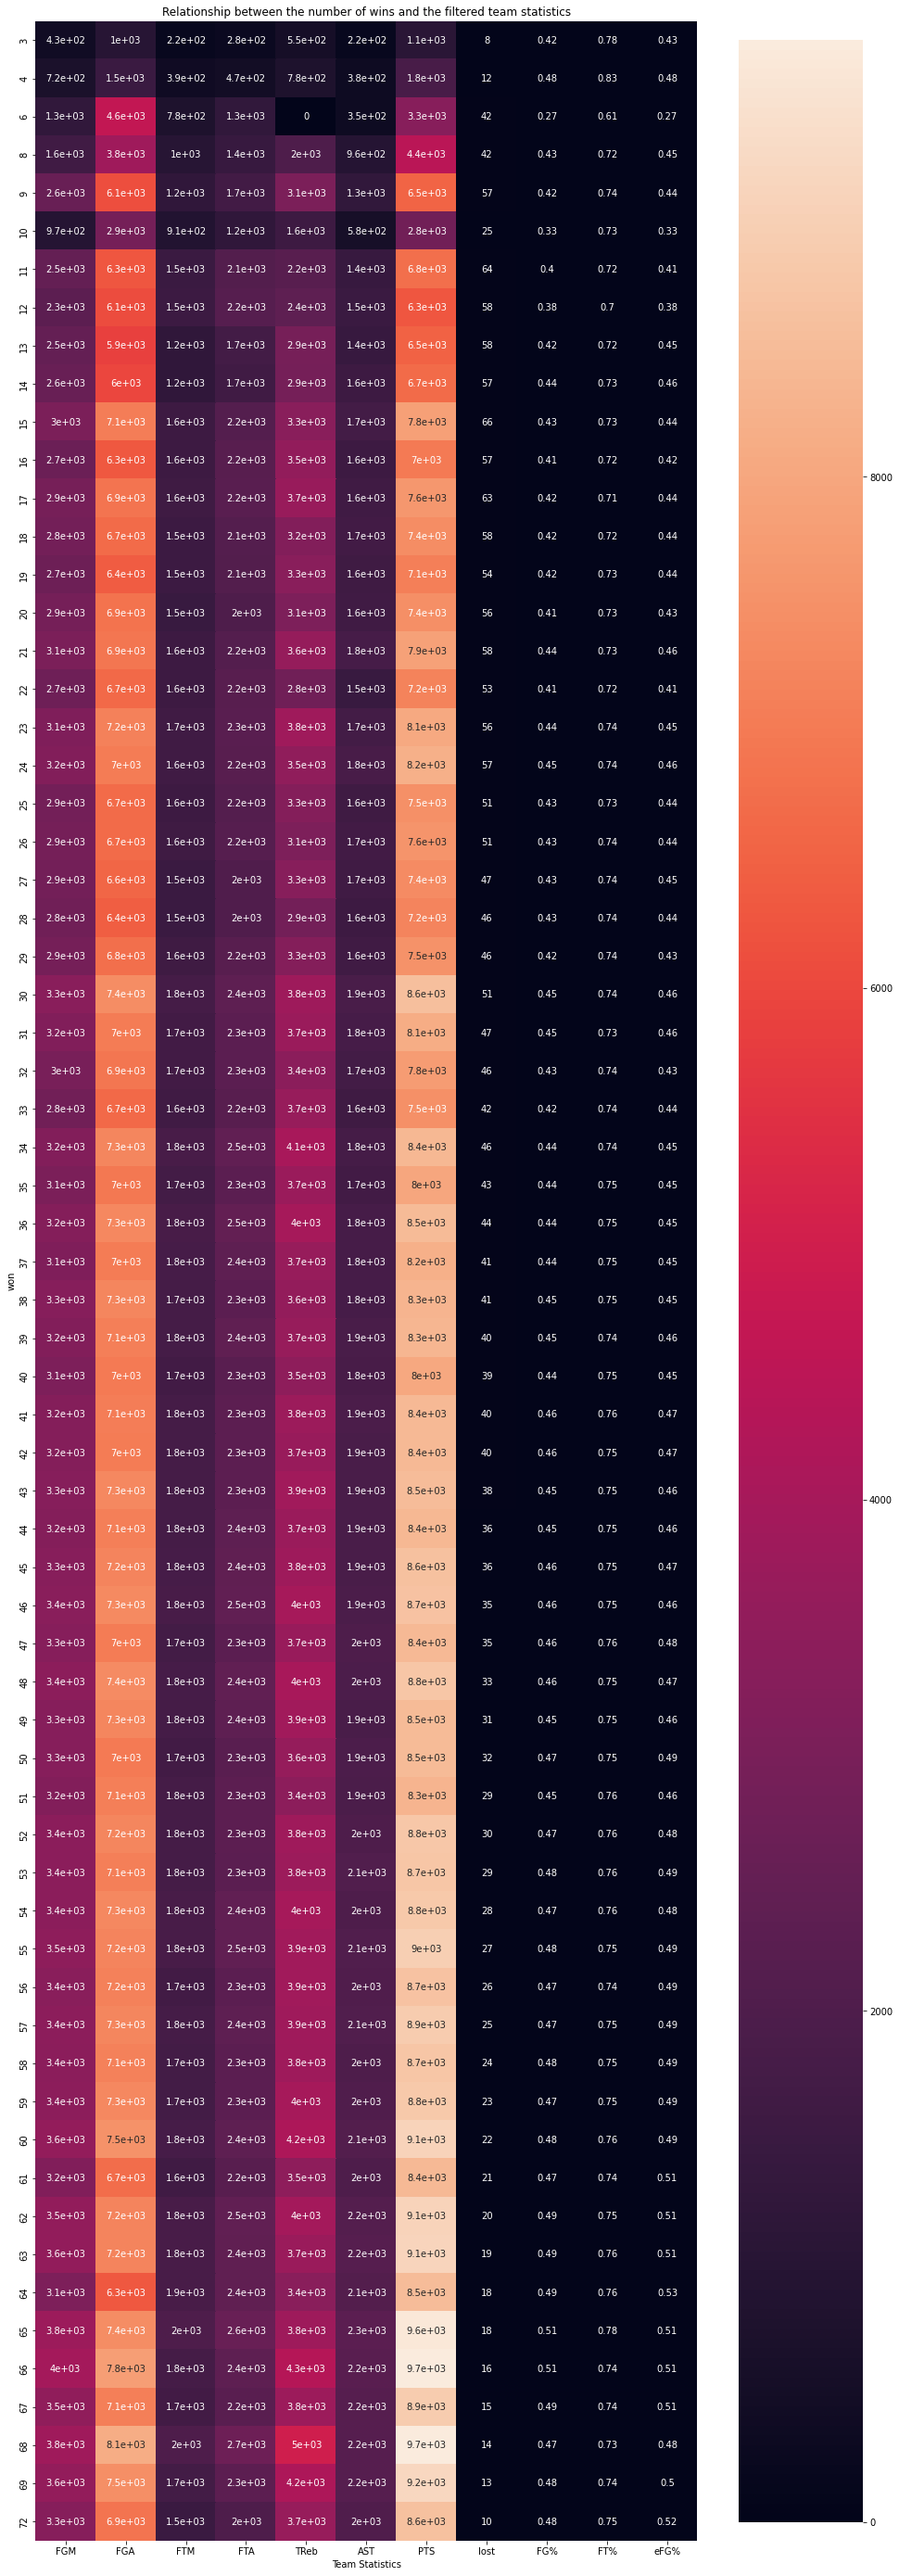

In [3]:
features = list(corr.index)
corr_df = df[features].groupby('won').mean()
plt.figure(figsize = (16,50))
plt.title("Relationship between the number of wins and the filtered team statistics")
sns.heatmap(data=corr_df,annot=True)
plt.xlabel("Team Statistics")

The correlation between the filtered features

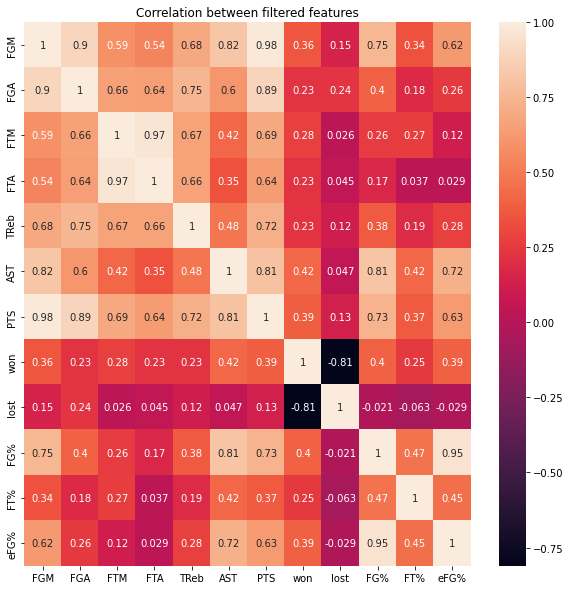

In [4]:
plt.figure(figsize=(10,10))
plt.title("Correlation between filtered features")
sns.heatmap(data=df[features].corr(), annot=True)

Removal of FG% from the filtered features. eFG% and FG% are highly correlated, the removal of FG% was done as eFG% is a more effective statistic in basketball. 

In [5]:
remove = ['FG%']
features = [item for item in features if item not in remove]
features

['FGM',
 'FGA',
 'FTM',
 'FTA',
 'TReb',
 'AST',
 'PTS',
 'won',
 'lost',
 'FT%',
 'eFG%']

Spliting the filtered features into the labels and dataset.

In [6]:
x_won = df[features].drop('won',1)
y_won = df['won']
x_won.head()

,FGM,FGA,FTM,FTA,TReb,AST,PTS,lost,FT%,eFG%
0,1397,5133,811,1375,0,470,3605,38,0.589818,0.272161
1,1879,6309,939,1550,0,436,4697,22,0.605806,0.297828
2,1674,5699,903,1428,0,494,4251,30,0.632353,0.293736
3,1437,5843,923,1494,0,482,3797,40,0.617805,0.245935
4,1465,5255,951,1438,0,457,3881,27,0.661335,0.278782


## Feature Selection for Lost Prediction Model

Finding features in the dataset that have a Pearson's Correlation Coefficient of at least medium strength with number of losses

In [7]:
l_corr = df.corr().abs()
l_corr = l_corr.loc[l_corr['lost']>.2]
l_corr.index

Index(['FGA', 'PF', 'O_FGM', 'O_FTM', 'O_FTA', 'O_TReb', 'O_AST', 'O_BLK',
       'O_PTS', 'won', 'lost', 'FTr'],
      dtype='object')


The relationship between filtered features above and number of losses are shown in the heatmap below.

Text(0.5, 428.09375, 'Team Statistics')

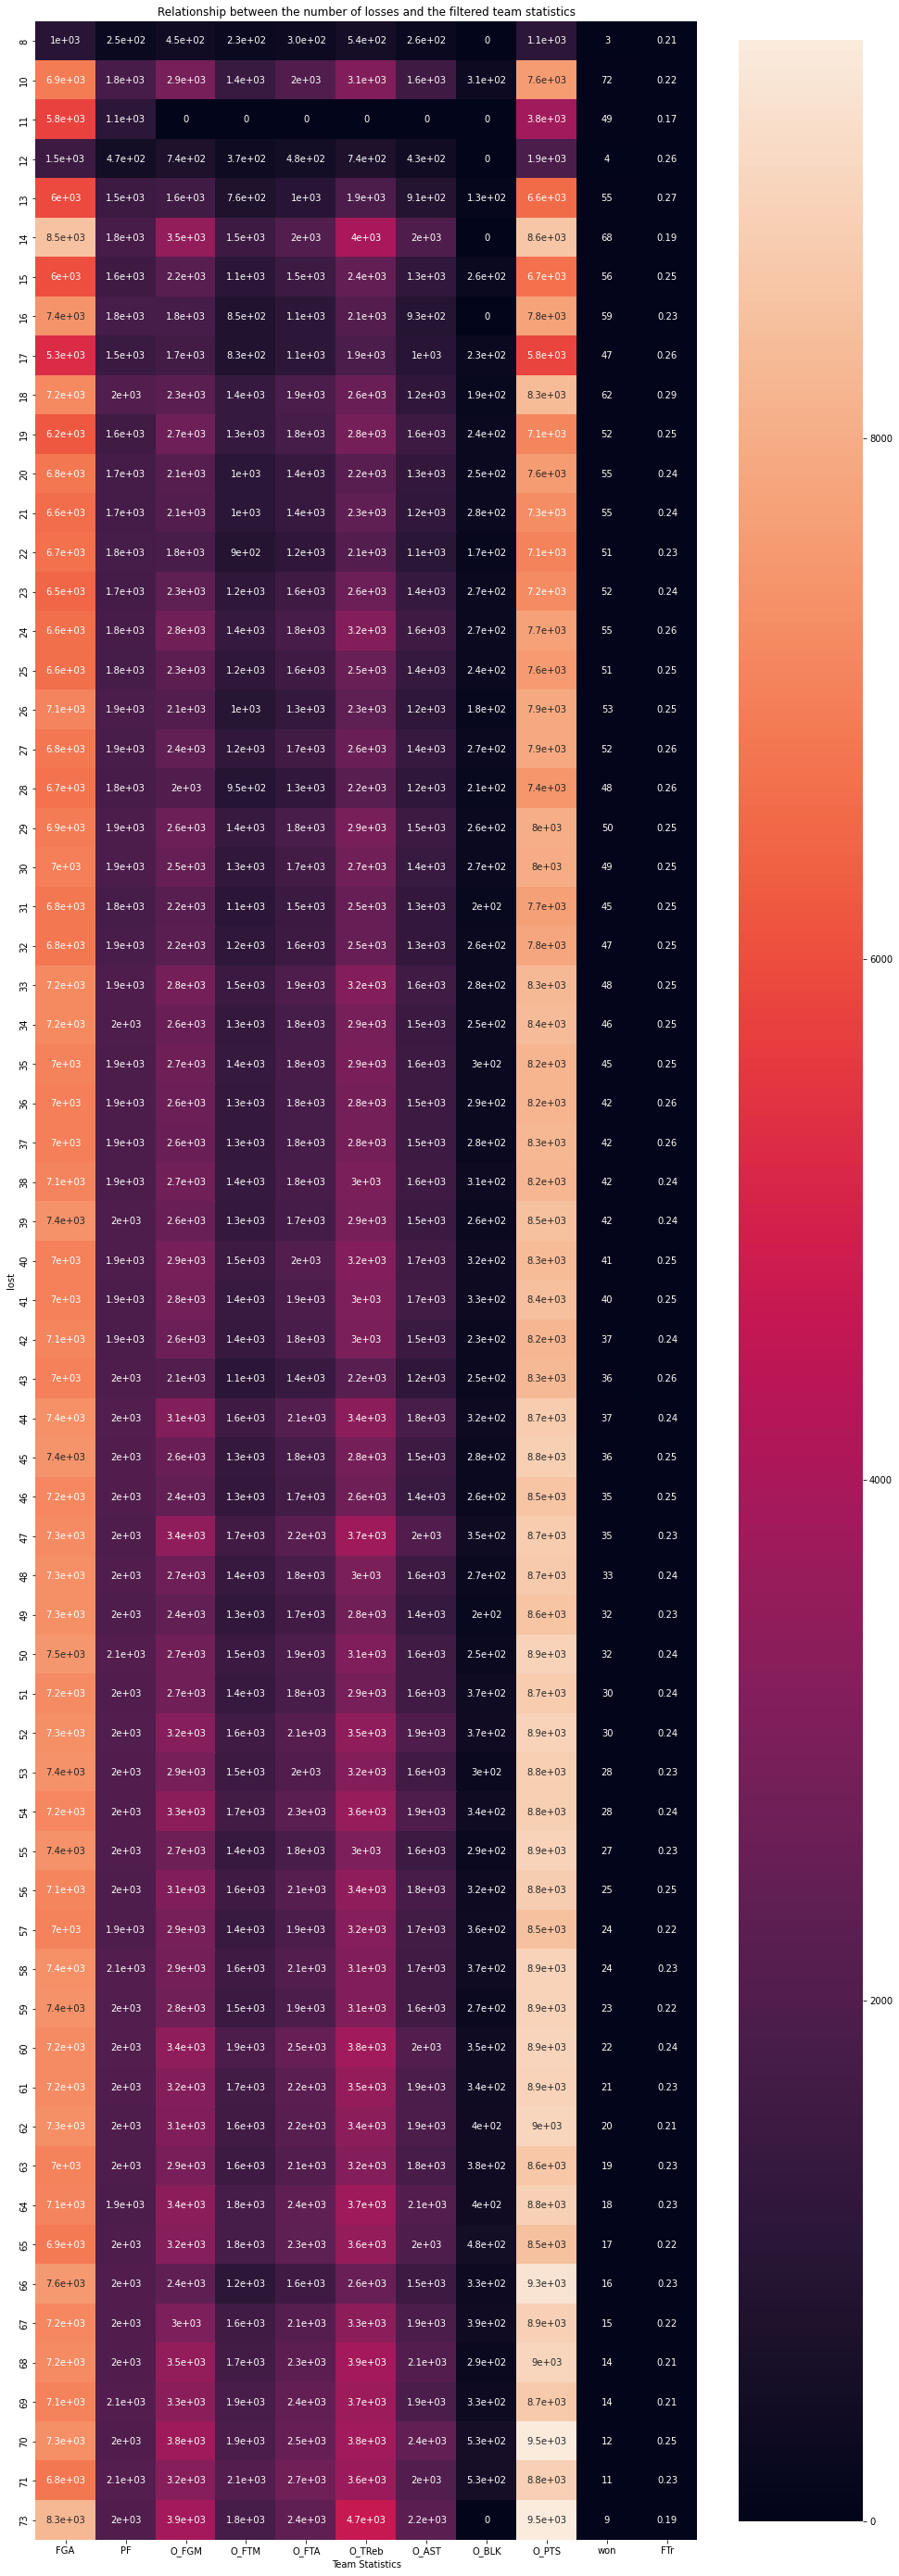

In [8]:
l_features = list(l_corr.index)
corr_df = df[l_features].groupby('lost').mean()
plt.figure(figsize = (16,50))
plt.title("Relationship between the number of losses and the filtered team statistics")
sns.heatmap(data=corr_df,annot=True)
plt.xlabel("Team Statistics")

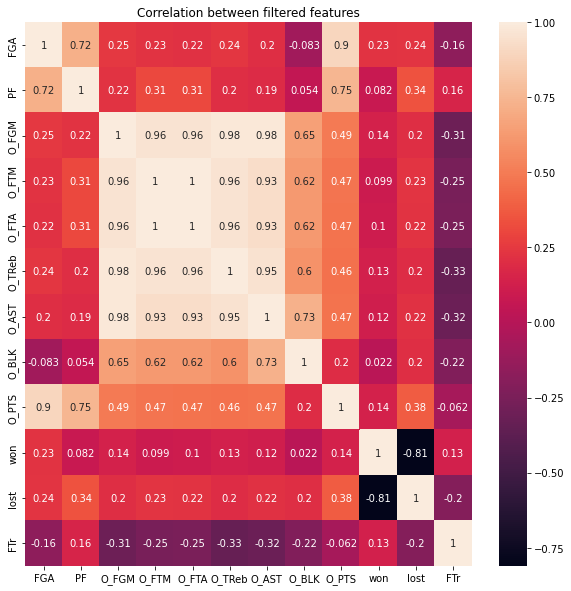

In [9]:
plt.figure(figsize=(10,10))
plt.title("Correlation between filtered features")
sns.heatmap(data=df[l_features].corr(), annot=True)

No features were removed from the filtered features for the lost model.

In [10]:
x_lost = df[l_features].drop('lost',1)
y_lost = df['lost']
x_lost.head()

,FGA,PF,O_FGM,O_FTM,O_FTA,O_TReb,O_AST,O_BLK,O_PTS,won,FTr
0,5133,1202,0,0,0,0,0,0,3900,22,0.157997
1,6309,1473,0,0,0,0,0,0,4471,39,0.148835
2,5699,1246,0,0,0,0,0,0,4308,30,0.158449
3,5843,1351,0,0,0,0,0,0,3918,20,0.157967
4,5255,1218,0,0,0,0,0,0,3840,33,0.180971


#Evaluation Functions

In [13]:
from sklearn import metrics
def evaluation(y_test, y_pred):
  evs = metrics.explained_variance_score(y_test, y_pred)
  mae = metrics.mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  msle = metrics.mean_squared_log_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)
  print("Explained Variance Score: ", evs)
  print("Mean Absolute Error: ", mae)
  print("Root Mean Squared Error: ", rmse)
  print("Mean Squared Log Error: ", msle)
  print("R2 Score: ", r2)
  return evs, mae, rmse, r2
  

# Model Creation: Win Prediction Model

In [12]:
# List used for plotting errors
win_evs = []
win_mae = []
win_rmse = []
win_r2 = []

Splitting of the data into training and testing sets. 80% Training, 20% Testing

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_won,y_won, test_size=0.20, random_state=2)

## Linear Models

Linear Regression

In [15]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  0.9416851166602096
Mean Absolute Error:  2.3063437915843976
Root Mean Squared Error:  2.9490732325050364
Mean Squared Log Error:  0.010318558655015998
R2 Score:  0.9416259736477012


Ridge Regression

In [16]:
model = linear_model.Ridge(alpha=0.5)
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  0.945048416286838
Mean Absolute Error:  2.2703726743333026
Root Mean Squared Error:  2.859317218278836
Mean Squared Log Error:  0.009257272395539362
R2 Score:  0.9450140844467891


Lasso Regression

In [17]:
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  0.9450679052498827
Mean Absolute Error:  2.268679699965258
Root Mean Squared Error:  2.856846087387297
Mean Squared Log Error:  0.009215253905549907
R2 Score:  0.9450352467821284


Bayesian Regression

In [18]:
model = linear_model.BayesianRidge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  0.9450689910153163
Mean Absolute Error:  2.2691695554752407
Root Mean Squared Error:  2.8572343273044636
Mean Squared Log Error:  0.009214047261101612
R2 Score:  0.9450362766089758


ElasticNet Regression

In [19]:
model = linear_model.ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  0.9443603391308522
Mean Absolute Error:  2.268774419393215
Root Mean Squared Error:  2.8596376107927033
Mean Squared Log Error:  0.00924429344947785
R2 Score:  0.9443292252864863


## Kernel Ridge Regression

In [20]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  0.9430534606032754
Mean Absolute Error:  2.344123070701305
Root Mean Squared Error:  2.918460732044546
Mean Squared Log Error:  0.008789922165634678
R2 Score:  0.9430494174301511


## Support Vector Machine Regression

In [21]:
from sklearn import svm
model = svm.SVR()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  -10.610443716663179
Mean Absolute Error:  9.504358144316292
Root Mean Squared Error:  11.656539131425227
Mean Squared Log Error:  0.10763559403862039
R2 Score:  -10.612565503657848


## Decision Tree Regression

In [22]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  0.9481387653093374
Mean Absolute Error:  1.0378151260504203
Root Mean Squared Error:  2.830654525373382
Mean Squared Log Error:  0.015408939002774
R2 Score:  0.947981862544697


## k-Nearest Neighbour Regression

In [23]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  0.026864899365650508
Mean Absolute Error:  7.34453781512605
Root Mean Squared Error:  9.256082866310738
Mean Squared Log Error:  0.06754744247586895
R2 Score:  0.026220570560514078


## Ensemble Models

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  0.9837347511523287
Mean Absolute Error:  0.8741271462552684
Root Mean Squared Error:  1.5760833718939877
Mean Squared Log Error:  0.004374755558714433
R2 Score:  0.9836729325112713


In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  0.9737546052026673
Mean Absolute Error:  0.7985714285714288
Root Mean Squared Error:  1.9877824306489478
Mean Squared Log Error:  0.009492292674641935
R2 Score:  0.9735740991762112


In [26]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  0.9249231933219316
Mean Absolute Error:  2.5980348064643803
Root Mean Squared Error:  3.3065728415601283
Mean Squared Log Error:  0.012321812100908042
R2 Score:  0.9163086527405154


In [ ]:
!pip install catboost

In [28]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Learning rate set to 0.040606
0:	learn: 12.1190011	total: 49.9ms	remaining: 49.8s
1:	learn: 11.7315723	total: 52.4ms	remaining: 26.2s
2:	learn: 11.3645220	total: 55.2ms	remaining: 18.3s
3:	learn: 10.9960946	total: 57.9ms	remaining: 14.4s
4:	learn: 10.6768366	total: 60.6ms	remaining: 12.1s
5:	learn: 10.3376215	total: 63.3ms	remaining: 10.5s
6:	learn: 10.0213202	total: 66.2ms	remaining: 9.39s
7:	learn: 9.7290371	total: 69ms	remaining: 8.56s
8:	learn: 9.4603581	total: 72ms	remaining: 7.92s
9:	learn: 9.1908912	total: 74.9ms	remaining: 7.41s
10:	learn: 8.9232879	total: 77.6ms	remaining: 6.98s
11:	learn: 8.6740113	total: 80.6ms	remaining: 6.63s
12:	learn: 8.4211333	total: 83.3ms	remaining: 6.32s
13:	learn: 8.2166038	total: 86.1ms	remaining: 6.07s
14:	learn: 7.9661071	total: 89.1ms	remaining: 5.85s
15:	learn: 7.7365184	total: 91.9ms	remaining: 5.65s
16:	learn: 7.5314123	total: 94.8ms	remaining: 5.48s
17:	learn: 7.3085844	total: 97.9ms	remaining: 5.34s
18:	learn: 7.1080314	total: 101ms	remaini

In [29]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

[06:16:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Explained Variance Score:  0.9860517791243456
Mean Absolute Error:  0.8411773833907953
Root Mean Squared Error:  1.4590071129755813
Mean Squared Log Error:  0.0033325735695896364
R2 Score:  0.9859539485027871


In [36]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
win_evs.append(evs)
win_mae.append(mae)
win_rmse.append(rmse)
win_r2.append(r2)

Explained Variance Score:  0.978119853360351
Mean Absolute Error:  0.8654301900872633
Root Mean Squared Error:  1.8369503184586051
Mean Squared Log Error:  0.008106932595722585
R2 Score:  0.9780942475456785


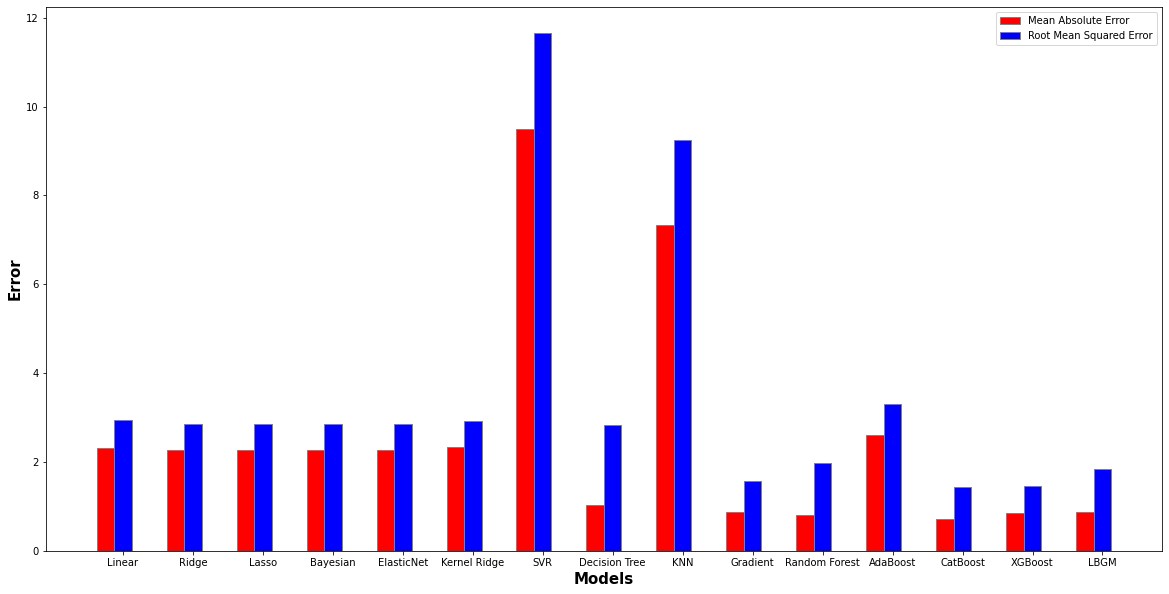

In [50]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10))

models = ['Linear', 'Ridge', 'Lasso', 'Bayesian', 'ElasticNet', 'Kernel Ridge', 'SVR', 'Decision Tree', 'KNN', 'Gradient Boosting', 'Random Forest', 'AdaBoost', 'CatBoost', 'XGBoost', 'LBGM']

 
# Set position of bar on X axis
br1 = np.arange(len(models))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, win_mae, color ='r', width = barWidth,
        edgecolor ='grey', label ='Mean Absolute Error')
plt.bar(br2, win_rmse, color ='b', width = barWidth,
        edgecolor ='grey', label ='Root Mean Squared Error')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Error', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(models))],
        ['Linear', 'Ridge', 'Lasso', 'Bayesian', 'ElasticNet', 'Kernel Ridge', 'SVR', 'Decision Tree', 'KNN', 'Gradient', 'Random Forest', 'AdaBoost', 'CatBoost', 'XGBoost', 'LBGM'])
 
plt.legend()
plt.show()

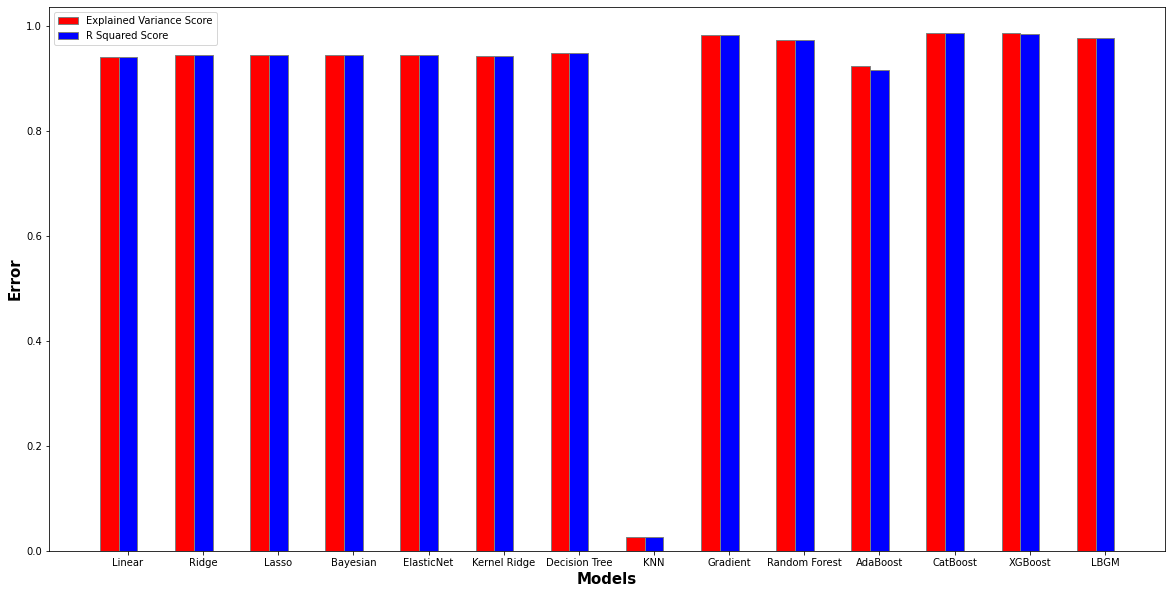

In [57]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10))

models = ['Linear', 'Ridge', 'Lasso', 'Bayesian', 'ElasticNet', 'Kernel Ridge', 'Decision Tree', 'KNN', 'Gradient Boosting', 'Random Forest', 'AdaBoost', 'CatBoost', 'XGBoost', 'LBGM']

 
# Set position of bar on X axis
br1 = np.arange(len(models))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, win_evs, color ='r', width = barWidth,
        edgecolor ='grey', label ='Explained Variance Score')
plt.bar(br2, win_r2, color ='b', width = barWidth,
        edgecolor ='grey', label ='R Squared Score')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Error', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(models))],
        ['Linear', 'Ridge', 'Lasso', 'Bayesian', 'ElasticNet', 'Kernel Ridge', 'Decision Tree', 'KNN', 'Gradient', 'Random Forest', 'AdaBoost', 'CatBoost', 'XGBoost', 'LBGM'])
 
plt.legend()
plt.show()

# Model Creation: Lost Prediction Model

In [59]:
# List used for plotting errors
lost_evs = []
lost_mae = []
lost_rmse = []
lost_r2 = []

Splitting of the data into training and testing sets. 80% Training, 20% Testing

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_lost,y_lost, test_size=0.20, random_state=2)

## Linear Models

Linear Regression

In [61]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  0.9566072000449775
Mean Absolute Error:  1.9033690297041435
Root Mean Squared Error:  2.5898539529357945
Mean Squared Log Error:  0.006855512284591951
R2 Score:  0.9559693916704867


Ridge Regression

In [62]:
model = linear_model.Ridge(alpha=0.5)
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  0.9565028958226829
Mean Absolute Error:  1.906210258679594
Root Mean Squared Error:  2.593331524302334
Mean Squared Log Error:  0.0068687027547771175
R2 Score:  0.9558552319592083


Lasso Regression

In [64]:
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  0.9566877294942068
Mean Absolute Error:  1.899568874786496
Root Mean Squared Error:  2.5891450383510426
Mean Squared Log Error:  0.006852781084182653
R2 Score:  0.9559967886066465


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.515e+03, tolerance: 1.453e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Bayesian Regression

In [65]:
model = linear_model.BayesianRidge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  0.9563457177879849
Mean Absolute Error:  1.9102723881579988
Root Mean Squared Error:  2.5968185779897617
Mean Squared Log Error:  0.006879953648862255
R2 Score:  0.9556882070859879


ElasticNet Regression

In [66]:
model = linear_model.ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  0.956196006836319
Mean Absolute Error:  1.9081061160448953
Root Mean Squared Error:  2.5900574953431184
Mean Squared Log Error:  0.006845145988493926
R2 Score:  0.9554947031235643


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.923e+03, tolerance: 1.453e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## Kernel Ridge Regression

In [67]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  0.9390294875367724
Mean Absolute Error:  2.4252886219553975
Root Mean Squared Error:  3.1501432649201755
Mean Squared Log Error:  0.007918838621300477
R2 Score:  0.9383145361685583


## Support Vector Machine Regression

In [68]:
from sklearn import svm
model = svm.SVR()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  -9.058992551345396
Mean Absolute Error:  9.58648442226782
Root Mean Squared Error:  11.62191684664984
Mean Squared Log Error:  0.09630087788334962
R2 Score:  -9.059070995950451


## Decision Tree Regression

In [70]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  0.9674897138899534
Mean Absolute Error:  1.0
Root Mean Squared Error:  2.306366781561952
Mean Squared Log Error:  0.00835092890258798
R2 Score:  0.9674547175688877


## k-Nearest Neighbour Regression

In [71]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  -0.7874239215492438
Mean Absolute Error:  9.2296918767507
Root Mean Squared Error:  11.449397457837058
Mean Squared Log Error:  0.08446121766877722
R2 Score:  -0.7875078023007722


## Ensemble Models

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  0.9887306273884182
Mean Absolute Error:  0.7824826632805872
Root Mean Squared Error:  1.3457140569544415
Mean Squared Log Error:  0.0019293832913094278
R2 Score:  0.9886847378665373


In [73]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  0.9846126935919595
Mean Absolute Error:  0.7591596638655461
Root Mean Squared Error:  1.5646703414172982
Mean Squared Log Error:  0.002370473284676172
R2 Score:  0.9845348504898958


In [74]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  0.947255384061192
Mean Absolute Error:  2.279381091407317
Root Mean Squared Error:  2.761547297475937
Mean Squared Log Error:  0.007412278106471319
R2 Score:  0.9425104707615852


In [75]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Learning rate set to 0.040606
0:	learn: 12.0227689	total: 5.06ms	remaining: 5.05s
1:	learn: 11.6610362	total: 8.12ms	remaining: 4.05s
2:	learn: 11.2995136	total: 11.1ms	remaining: 3.7s
3:	learn: 10.9552825	total: 14.2ms	remaining: 3.53s
4:	learn: 10.6264340	total: 17.4ms	remaining: 3.46s
5:	learn: 10.3313139	total: 20.5ms	remaining: 3.39s
6:	learn: 10.0328814	total: 23.5ms	remaining: 3.33s
7:	learn: 9.7482465	total: 26.6ms	remaining: 3.29s
8:	learn: 9.4777125	total: 29.9ms	remaining: 3.29s
9:	learn: 9.2159577	total: 33ms	remaining: 3.26s
10:	learn: 8.9681623	total: 36.2ms	remaining: 3.25s
11:	learn: 8.7140638	total: 39.2ms	remaining: 3.23s
12:	learn: 8.4824587	total: 42.6ms	remaining: 3.23s
13:	learn: 8.2374680	total: 45.8ms	remaining: 3.22s
14:	learn: 7.9936591	total: 48.8ms	remaining: 3.2s
15:	learn: 7.8022429	total: 51.7ms	remaining: 3.18s
16:	learn: 7.6341690	total: 54.9ms	remaining: 3.17s
17:	learn: 7.4280854	total: 57.9ms	remaining: 3.16s
18:	learn: 7.2210175	total: 61.1ms	remain

In [76]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

[07:13:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Explained Variance Score:  0.9884270685714576
Mean Absolute Error:  0.7809388777788948
Root Mean Squared Error:  1.3684223305341836
Mean Squared Log Error:  0.0018754402631925523
R2 Score:  0.9884096503861068


In [77]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
evs, mae, rmse, r2 = evaluation(pred, y_test)
lost_evs.append(evs)
lost_mae.append(mae)
lost_rmse.append(rmse)
lost_r2.append(r2)

Explained Variance Score:  0.986728503094603
Mean Absolute Error:  0.8324926009909664
Root Mean Squared Error:  1.4621725035894828
Mean Squared Log Error:  0.0024421638531343347
R2 Score:  0.9866694707518996


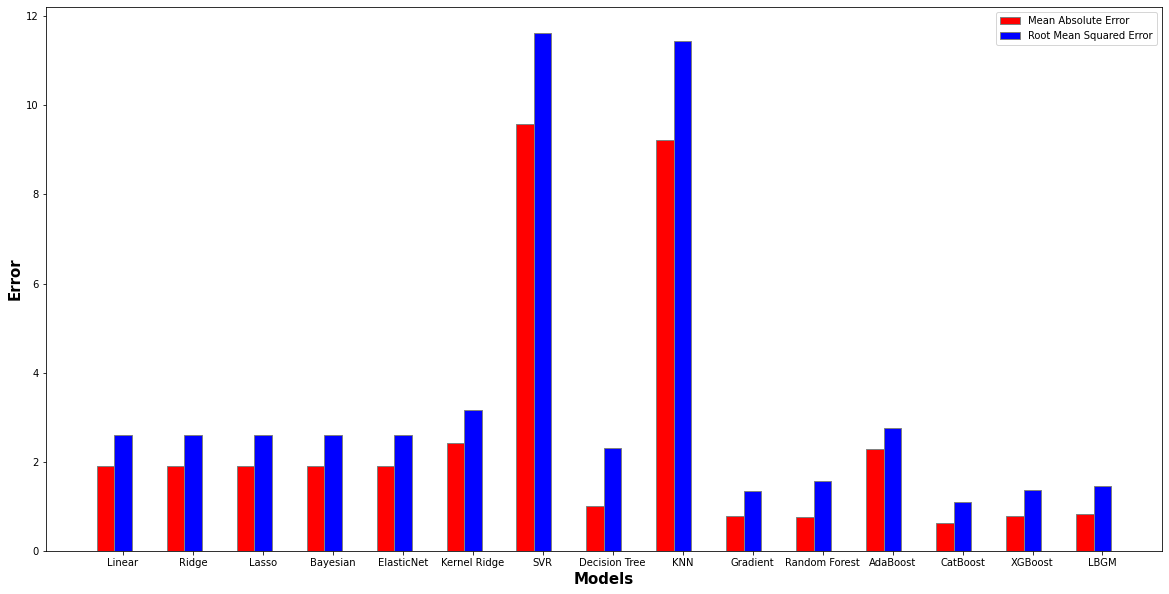

In [78]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10))

models = ['Linear', 'Ridge', 'Lasso', 'Bayesian', 'ElasticNet', 'Kernel Ridge', 'SVR', 'Decision Tree', 'KNN', 'Gradient Boosting', 'Random Forest', 'AdaBoost', 'CatBoost', 'XGBoost', 'LBGM']

 
# Set position of bar on X axis
br1 = np.arange(len(models))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, lost_mae, color ='r', width = barWidth,
        edgecolor ='grey', label ='Mean Absolute Error')
plt.bar(br2, lost_rmse, color ='b', width = barWidth,
        edgecolor ='grey', label ='Root Mean Squared Error')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Error', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(models))],
        ['Linear', 'Ridge', 'Lasso', 'Bayesian', 'ElasticNet', 'Kernel Ridge', 'SVR', 'Decision Tree', 'KNN', 'Gradient', 'Random Forest', 'AdaBoost', 'CatBoost', 'XGBoost', 'LBGM'])
 
plt.legend()
plt.show()

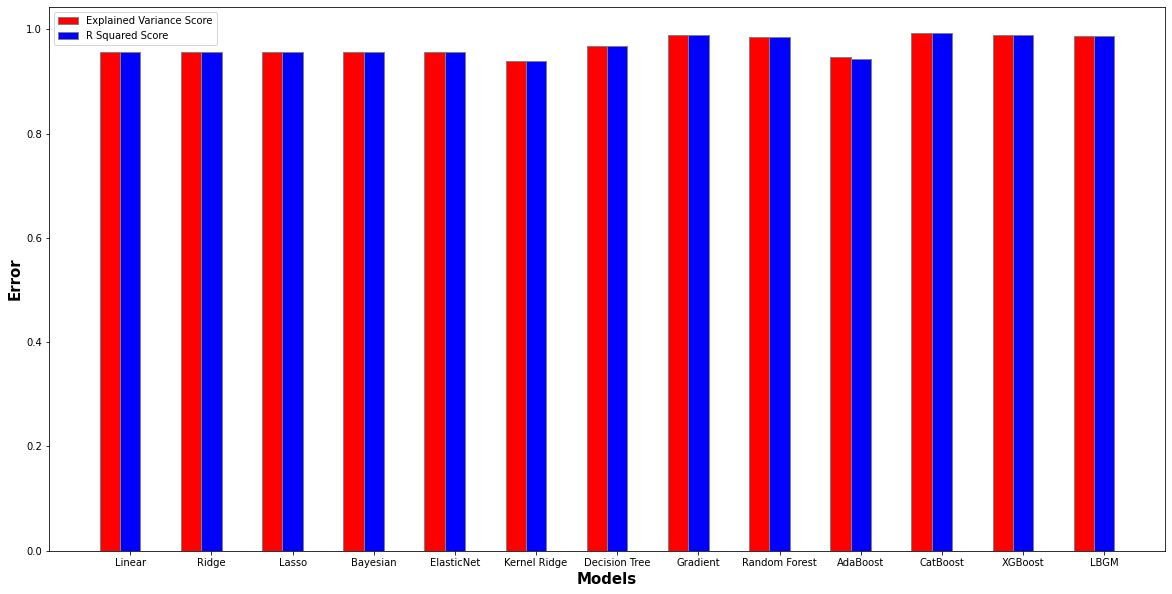

In [84]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10))

models = ['Linear', 'Ridge', 'Lasso', 'Bayesian', 'ElasticNet', 'Kernel Ridge', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'AdaBoost', 'CatBoost', 'XGBoost', 'LBGM']

 
# Set position of bar on X axis
br1 = np.arange(len(models))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, lost_evs, color ='r', width = barWidth,
        edgecolor ='grey', label ='Explained Variance Score')
plt.bar(br2, lost_r2, color ='b', width = barWidth,
        edgecolor ='grey', label ='R Squared Score')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Error', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(models))],
        ['Linear', 'Ridge', 'Lasso', 'Bayesian', 'ElasticNet', 'Kernel Ridge', 'Decision Tree', 'Gradient', 'Random Forest', 'AdaBoost', 'CatBoost', 'XGBoost', 'LBGM'])
 
plt.legend()
plt.show()

# Final Models and Prediction

In [28]:
from sklearn import metrics
def evaluation(y_test, y_pred):
  evs = metrics.explained_variance_score(y_test, y_pred)
  mae = metrics.mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  msle = metrics.mean_squared_log_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)
  print("Explained Variance Score: ", evs)
  print("Mean Absolute Error: ", mae)
  print("Root Mean Squared Error: ", rmse)
  print("Mean Squared Log Error: ", msle)
  print("R2 Score: ", r2)

## Final Models

In [ ]:
!pip install catboost

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filepath = "/content/team_season.csv" # Please enter path to team_season.csv here
df = pd.read_csv(filepath)

# Renaming of columns in the corpus. This is done for easier understanding of the data. 
# The capital O, in O_FGA for example, indicates data for the opposing teams. 
# The lack of the O, in FGA for example, indicates the teams data.

df.rename(
    columns={"team" : "Team", "o_fgm" : "FGM", "o_fga" : "FGA", "o_ftm" : "FTM", "o_fta" : "FTA", "o_oreb" : "OReb", "o_dreb" : "DReb",
       "o_reb" : "TReb", "o_asts" : "AST", "o_pf" : "PF", "o_stl" : "STL", "o_to" : "TO", "o_blk" : "BLK", "o_3pm" : "3PM", "o_3pa" : "3PA",
       "o_pts" : "PTS", "d_fgm" : "O_FGM", "d_fga" : "O_FGA", "d_ftm" : "O_FTM", "d_fta" : "O_FTA", "d_oreb" : "O_OReb", "d_dreb" : "O_DReb", 
       "d_reb" : "O_TReb", "d_asts" : "O_AST", "d_pf" : "O_PF", "d_stl" : "O_STL", "d_to" : "O_TO", "d_blk" : "O_BLK", "d_3pm" : "O_3PM",
       "d_3pa" : "O_3PA", "d_pts" : "O_PTS"}, inplace=True)


# Further metrics calculated to help build a stronger model

# Field Goal Percentage = Field Goal / Field Goal Attempted
df["FG%"] = df["FGM"] / df["FGA"]
df["FG%"] = df["FG%"].fillna(0)

df["O_FG%"] = df["O_FGM"] / df["O_FGA"]
df["O_FG%"] = df["O_FG%"].fillna(0)

# Free Throw Percentage = Free Throw / Free Throw Attempted
df["FT%"] = df["FTM"] / df["FTA"]
df["FT%"] = df["FT%"].fillna(0)

df["O_FT%"] = df["O_FTM"] / df["O_FTA"]
df["O_FT%"] = df["O_FT%"].fillna(0)

# 3- Point Field Goal Percentage = 3-Point Field Goal / 3-Point Field Goal Attempted
df["3P%"] = df["3PM"] / df["3PA"]
df["3P%"] = df["3P%"].fillna(0)

df["O_3P%"] = df["O_3PM"] / df["O_3PA"]
df["O_3P%"] = df["O_3P%"].fillna(0)

# Free Throw Rate = Free Throw / Field Goal Attempted
df["FTr"] = df["FTM"] / df["FGA"]
df["FTr"] = df["FTr"].fillna(0)

# Turnover Percentage = Turnover / ((0.44 * Field Goal Attempted) + Turnover)
df["TO%"] = df["TO"] / (df["FGA"] + (0.44 * df["FTA"]) + df["TO"])
df["TO%"] = df["TO%"].fillna(0)

df["O_TO%"] = df["O_TO"] / (df["O_FGA"] + (0.44 * df["O_FTA"]) + df["O_TO"])
df["O_TO%"] = df["O_TO%"].fillna(0)

# Offensive Rebound Percentage = Offensive Rebound / (Offensive Rebound + Defensive Rebound)
df["OReb%"] = df["OReb"] / (df["OReb"] + df["DReb"])
df["OReb%"] = df["OReb%"].fillna(0)

# Effective Field Goal Percentage = (Field Goal + (0.5 * 3-Point Field Goal)) / Field Goal Attempted
df["eFG%"] = (df["FGM"] + (0.5 * df["3PM"])) / df["FGA"]
df["eFG%"] = df["eFG%"].fillna(0)

df["O_eFG%"] = (df["O_FGM"] + (0.5 * df["O_3PM"])) / df["O_FGA"]
df["O_eFG%"] = df["O_eFG%"].fillna(0)


df.drop(columns=["year", "leag"], inplace=True)

df.head()

,Team,FGM,FGA,FTM,FTA,OReb,DReb,TReb,AST,PF,STL,TO,BLK,3PM,3PA,PTS,O_FGM,O_FGA,O_FTM,O_FTA,O_OReb,O_DReb,O_TReb,O_AST,O_PF,O_STL,O_TO,O_BLK,O_3PM,O_3PA,O_PTS,pace,won,lost,FG%,O_FG%,FT%,O_FT%,3P%,O_3P%,FTr,TO%,O_TO%,OReb%,eFG%,O_eFG%
0,BOS,1397,5133,811,1375,0,0,0,470,1202,0,0,0,0,0,3605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3900,0.0,22,38,0.272161,0.0,0.589818,0.0,0.0,0.0,0.157997,0.0,0.0,0.0,0.272161,0.0
1,CH1,1879,6309,939,1550,0,0,0,436,1473,0,0,0,0,0,4697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4471,0.0,39,22,0.297828,0.0,0.605806,0.0,0.0,0.0,0.148835,0.0,0.0,0.0,0.297828,0.0
2,CL1,1674,5699,903,1428,0,0,0,494,1246,0,0,0,0,0,4251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4308,0.0,30,30,0.293736,0.0,0.632353,0.0,0.0,0.0,0.158449,0.0,0.0,0.0,0.293736,0.0
3,DE1,1437,5843,923,1494,0,0,0,482,1351,0,0,0,0,0,3797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3918,0.0,20,40,0.245935,0.0,0.617805,0.0,0.0,0.0,0.157967,0.0,0.0,0.0,0.245935,0.0
4,NYK,1465,5255,951,1438,0,0,0,457,1218,0,0,0,0,0,3881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3840,0.0,33,27,0.278782,0.0,0.661335,0.0,0.0,0.0,0.180971,0.0,0.0,0.0,0.278782,0.0


### Win Model

In [31]:
win_features = ['FGM','FGA','FTM','FTA','TReb','AST','PTS','lost','FT%','eFG%']
win_model_df = df[win_features]
win_model_labels = df['won']
win_model_df.head()

,FGM,FGA,FTM,FTA,TReb,AST,PTS,lost,FT%,eFG%
0,1397,5133,811,1375,0,470,3605,38,0.589818,0.272161
1,1879,6309,939,1550,0,436,4697,22,0.605806,0.297828
2,1674,5699,903,1428,0,494,4251,30,0.632353,0.293736
3,1437,5843,923,1494,0,482,3797,40,0.617805,0.245935
4,1465,5255,951,1438,0,457,3881,27,0.661335,0.278782


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(win_model_df,win_model_labels, test_size=0.20, random_state=2)

In [35]:
from catboost import CatBoostRegressor
win_model = CatBoostRegressor()
win_model.fit(X_train, y_train)
pred = win_model.predict(X_test)
evaluation(pred, y_test)

Learning rate set to 0.040606
0:	learn: 12.1190011	total: 7.56ms	remaining: 7.55s
1:	learn: 11.7315723	total: 11ms	remaining: 5.51s
2:	learn: 11.3645220	total: 14.6ms	remaining: 4.84s
3:	learn: 10.9960946	total: 17.8ms	remaining: 4.43s
4:	learn: 10.6768366	total: 20.8ms	remaining: 4.13s
5:	learn: 10.3376215	total: 23.8ms	remaining: 3.94s
6:	learn: 10.0213202	total: 27ms	remaining: 3.82s
7:	learn: 9.7290371	total: 30.3ms	remaining: 3.76s
8:	learn: 9.4603581	total: 33.6ms	remaining: 3.7s
9:	learn: 9.1908912	total: 36.8ms	remaining: 3.64s
10:	learn: 8.9232879	total: 40.6ms	remaining: 3.65s
11:	learn: 8.6740113	total: 43.8ms	remaining: 3.61s
12:	learn: 8.4211333	total: 50.5ms	remaining: 3.83s
13:	learn: 8.2166038	total: 57.3ms	remaining: 4.03s
14:	learn: 7.9661071	total: 61.3ms	remaining: 4.02s
15:	learn: 7.7365184	total: 64ms	remaining: 3.93s
16:	learn: 7.5314123	total: 66.7ms	remaining: 3.85s
17:	learn: 7.3085844	total: 69.4ms	remaining: 3.79s
18:	learn: 7.1080314	total: 72.2ms	remaining

### Lost Model

In [32]:
lost_features = ['FGA', 'PF', 'O_FGM', 'O_FTM', 'O_FTA', 'O_TReb', 'O_AST', 'O_BLK', 'O_PTS', 'won', 'FTr']
lost_model_df = df[lost_features]
lost_model_labels = df['lost']
lost_model_df.head()

,FGA,PF,O_FGM,O_FTM,O_FTA,O_TReb,O_AST,O_BLK,O_PTS,won,FTr
0,5133,1202,0,0,0,0,0,0,3900,22,0.157997
1,6309,1473,0,0,0,0,0,0,4471,39,0.148835
2,5699,1246,0,0,0,0,0,0,4308,30,0.158449
3,5843,1351,0,0,0,0,0,0,3918,20,0.157967
4,5255,1218,0,0,0,0,0,0,3840,33,0.180971


In [26]:
from sklearn.model_selection import train_test_split
X_lost_train, X_lost_test, y_lost_train, y_lost_test = train_test_split(lost_model_df,lost_model_labels, test_size=0.20, random_state=2)

In [29]:
from catboost import CatBoostRegressor
lost_model = CatBoostRegressor()
lost_model.fit(X_lost_train, y_lost_train)
pred = lost_model.predict(X_lost_test)
evaluation(pred, y_lost_test)

Learning rate set to 0.040606
0:	learn: 12.0227689	total: 3.94ms	remaining: 3.94s
1:	learn: 11.6610362	total: 9.33ms	remaining: 4.65s
2:	learn: 11.2995136	total: 13.7ms	remaining: 4.57s
3:	learn: 10.9552825	total: 21ms	remaining: 5.24s
4:	learn: 10.6264340	total: 28.6ms	remaining: 5.69s
5:	learn: 10.3313139	total: 32.5ms	remaining: 5.39s
6:	learn: 10.0328814	total: 36.3ms	remaining: 5.15s
7:	learn: 9.7482465	total: 39.7ms	remaining: 4.93s
8:	learn: 9.4777125	total: 43.2ms	remaining: 4.76s
9:	learn: 9.2159577	total: 46.8ms	remaining: 4.63s
10:	learn: 8.9681623	total: 50.3ms	remaining: 4.53s
11:	learn: 8.7140638	total: 53.8ms	remaining: 4.43s
12:	learn: 8.4824587	total: 57ms	remaining: 4.33s
13:	learn: 8.2374680	total: 61.1ms	remaining: 4.3s
14:	learn: 7.9936591	total: 64.6ms	remaining: 4.25s
15:	learn: 7.8022429	total: 68.1ms	remaining: 4.19s
16:	learn: 7.6341690	total: 71.5ms	remaining: 4.13s
17:	learn: 7.4280854	total: 75.2ms	remaining: 4.1s
18:	learn: 7.2210175	total: 79.1ms	remainin

## The Average of the Teams Data is used as a means to perdict the results given two teams

In [4]:
def teamList():
  file = open("/content/teams.txt","r") # Please Enter path to teams.txt here
  file.readline()
  teams = []
  id = 0
  for x in file:
    a = x.split(",")
    teams.append(a[0])

  return teams

In [15]:
teams = teamList()

# For each team the average of FGM, FGA, FTM, FTA, TReb, AST, PTS, FT%, o_FT%, eFG%,PF, O_FGM, O_FTM, O_FTA, O_TReb, O_AST, O_BLK, FTr, won, and lost is calculated 

def createAvgDataframe(df):

  ave_df_1 = df.groupby(['Team'],as_index=False).FGM.mean() # FGM ave
  ave_df_2 = df.groupby(['Team'],as_index=False).FGA.mean() # FGA ave
  ave_df_3 = df.groupby(['Team'],as_index=False).FTM.mean() # FTM ave
  ave_df_4 = df.groupby(['Team'],as_index=False).FTA.mean() # FTA ave

  ave_df_5 = df.groupby(['Team'],as_index=False).TReb.mean() # TReb ave
  ave_df_6 = df.groupby(['Team'],as_index=False).AST.mean() # AST ave
  ave_df_7 = df.groupby(['Team'],as_index=False).PTS.mean() # PTS ave
  df.rename(columns={'FT%':'FTPer'},inplace=True)
  ave_df_8 = df.groupby(['Team'],as_index=False).FTPer.mean() # FT% ave

  df.rename(columns={'O_FT%':'oFTPer'},inplace=True)
  ave_df_9 = df.groupby(['Team'],as_index=False).oFTPer.mean() # O_FT% ave
  ave_df_10 = df.groupby(['Team'],as_index=False).PF.mean() # PF ave
  ave_df_11 = df.groupby(['Team'],as_index=False).O_FGM.mean() # O_FGM ave
  ave_df_12 = df.groupby(['Team'],as_index=False).O_FTM.mean() # O_FTM ave

  ave_df_13 = df.groupby(['Team'],as_index=False).O_FTA.mean() # O_FTA ave
  ave_df_14 = df.groupby(['Team'],as_index=False).O_TReb.mean() # O_TReb ave
  ave_df_15 = df.groupby(['Team'],as_index=False).O_AST.mean() # O_AST ave
  ave_df_16 = df.groupby(['Team'],as_index=False).O_BLK.mean() # O_BLK ave

  df.rename(columns={'eFG%':'eFGPer'},inplace=True)
  ave_df_17 = df.groupby(['Team'],as_index=False).eFGPer.mean() # eFG% ave
  ave_df_18 = df.groupby(['Team'],as_index=False).FTr.mean() # FTr ave
  ave_df_19 = df.groupby(['Team'],as_index=False).won.mean() # Won ave
  ave_df_20 = df.groupby(['Team'],as_index=False).lost.mean()  # Lost ave
  ave_df_21 = df.groupby(['Team'],as_index=False).O_PTS.mean()  # O_PTS ave

  newDf= pd.merge(ave_df_2, ave_df_3, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_4, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_5, on="Team",how="right")

  newDf= pd.merge(newDf, ave_df_6, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_7, on="Team",how="right") 

  newDf= pd.merge(newDf, ave_df_8, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_9, on="Team",how="right")    

  newDf= pd.merge(newDf, ave_df_10, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_11, on="Team",how="right")
 
  newDf= pd.merge(newDf, ave_df_12, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_13, on="Team",how="right")
 
  newDf= pd.merge(newDf, ave_df_14, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_15, on="Team",how="right")

  newDf= pd.merge(newDf, ave_df_16, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_17, on="Team",how="right")

  newDf= pd.merge(newDf, ave_df_18, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_19, on="Team",how="right")

  newDf= pd.merge(newDf, ave_df_20, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_21, on="Team",how="right")

  newDf= pd.merge(newDf, ave_df_1, on="Team",how="right")
  return newDf

ave_df = createAvgDataframe(df)
ave_df.head()

,Team,FGA,FTM,FTA,TReb,AST,PTS,FTPer,oFTPer,PF,O_FGM,O_FTM,O_FTA,O_TReb,O_AST,O_BLK,eFGPer,FTr,won,lost,O_PTS,FGM
0,ANA,7606.000000,2141.000000,2916.000000,4158.000000,1297.000000,8704.000000,0.734225,0.703871,2174.000000,3388.00000,2182.000000,3100.000000,4449.000000,1308.000000,0.000000,0.431436,0.281488,25.000000,53.000000,9057.000000,3172.000000
1,AND,6254.000000,1703.000000,2343.000000,0.000000,1240.000000,5589.000000,0.726846,0.000000,1806.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310681,0.272306,37.000000,27.000000,5350.000000,1943.000000
2,ATL,7017.189189,1748.621622,2323.270270,3656.621622,1831.891892,8387.837838,0.752730,0.716864,1943.621622,3069.72973,1590.324324,2095.486486,3383.918919,1791.567568,353.216216,0.472906,0.249490,40.135135,41.000000,8407.891892,3235.189189
3,BA1,5307.428571,1502.428571,2100.571429,2052.428571,1167.142857,5128.714286,0.715625,0.000000,1710.714286,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340171,0.281543,22.571429,41.714286,5362.857143,1813.142857
4,BAL,8190.800000,1985.400000,2705.900000,4962.900000,1737.700000,9256.600000,0.735564,0.223307,2010.000000,1071.60000,498.500000,669.800000,1290.500000,555.800000,0.000000,0.444001,0.242416,40.100000,41.200000,9278.800000,3635.600000


In [43]:
win_features = ['FGM','FGA','FTM','FTA','TReb','AST','PTS','lost','FTPer','eFGPer']
win_df = ave_df[win_features]
win_df.rename(columns={"FTPer" : "FT%", "eFGPer" : "eFG%"}, inplace=True)
win_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,FGM,FGA,FTM,FTA,TReb,AST,PTS,lost,FT%,eFG%
0,3172.000000,7606.000000,2141.000000,2916.000000,4158.000000,1297.000000,8704.000000,53.000000,0.734225,0.431436
1,1943.000000,6254.000000,1703.000000,2343.000000,0.000000,1240.000000,5589.000000,27.000000,0.726846,0.310681
2,3235.189189,7017.189189,1748.621622,2323.270270,3656.621622,1831.891892,8387.837838,41.000000,0.752730,0.472906
3,1813.142857,5307.428571,1502.428571,2100.571429,2052.428571,1167.142857,5128.714286,41.714286,0.715625,0.340171
4,3635.600000,8190.800000,1985.400000,2705.900000,4962.900000,1737.700000,9256.600000,41.200000,0.735564,0.444001


In [21]:
lost_features = ['FGA', 'PF', 'O_FGM', 'O_FTM', 'O_FTA', 'O_TReb', 'O_AST', 'O_BLK', 'O_PTS', 'won', 'FTr']
lost_df = ave_df[lost_features]
lost_df.head()

,FGA,PF,O_FGM,O_FTM,O_FTA,O_TReb,O_AST,O_BLK,O_PTS,won,FTr
0,7606.000000,2174.000000,3388.00000,2182.000000,3100.000000,4449.000000,1308.000000,0.000000,9057.000000,25.000000,0.281488
1,6254.000000,1806.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5350.000000,37.000000,0.272306
2,7017.189189,1943.621622,3069.72973,1590.324324,2095.486486,3383.918919,1791.567568,353.216216,8407.891892,40.135135,0.249490
3,5307.428571,1710.714286,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5362.857143,22.571429,0.281543
4,8190.800000,2010.000000,1071.60000,498.500000,669.800000,1290.500000,555.800000,0.000000,9278.800000,40.100000,0.242416


In [65]:
while True:
  team1 = input("Enter a number between 0 and 90, both included, or X to exit: ")
  if str(team1).upper() == 'X':
    break
  while True:
    string = "Enter a number between 0 and 90, both included, but not " + team1 + ": "
    team2 = input(string)
    if team2 != team1:
      break
  # Predict the number of wins and losses for team 1
  team1_win_pred = win_model.predict(win_df.iloc[[team1]])
  team1_lost_pred = lost_model.predict(lost_df.iloc[[team1]])

  # Calculate win-loss ratio for team 1
  team1_win_loss = team1_win_pred / (team1_win_pred + team1_lost_pred)
  
  # Predict the number of wins and losses for team 2
  team2_win_pred = win_model.predict(win_df.iloc[[team2]])
  team2_lost_pred = lost_model.predict(lost_df.iloc[[team2]])

  # Calculate win-loss ratio for team 2
  team2_win_loss = team2_win_pred / (team2_win_pred + team2_lost_pred)
  
  print("Team 1 Selected: ", ave_df.iloc[[team1]]['Team'], ".\nWin-Loss Ratio = ", team1_win_loss)
  print("Team 2 Selected: ", ave_df.iloc[[team2]]['Team'], ".\nWin-Loss Ratio = ", team2_win_loss)

  if team1_win_loss > team2_win_loss:
    print("Team 1 will win! \n")
  else: 
    print("Team 2 will win! \n")

Enter a number between 0 and 90, both included, or X to exit: 0
Enter a number between 0 and 90, both included, but not 0: 90
Team 1 Selected:  0    ANA
Name: Team, dtype: object .
Win-Loss Ratio =  [0.32406108]
Team 2 Selected:  90    WSC
Name: Team, dtype: object .
Win-Loss Ratio =  [0.54999019]
Team 2 will win! 

Enter a number between 0 and 90, both included, or X to exit: x
